# Exploratory Data Analysis - Global Terrorism
TSF - Task 4
Level - Intermediate

Author : Muralidhar Bhusal

In [1]:
import pandas as pd
import numpy as np

In [2]:
data = pd.read_csv("/content/drive/MyDrive/globalterrorismdb_0718dist.csv", encoding = 'latin8')
pd.set_option('display.max_columns', 135) # no of columns to display
data.head()

<ipython-input-2-cf592508b008>:1: DtypeWarning: Columns (4,6,31,33,61,62,63,76,79,90,92,94,96,114,115,121) have mixed types. Specify dtype option on import or set low_memory=False.
  data = pd.read_csv("/content/drive/MyDrive/globalterrorismdb_0718dist.csv", encoding = 'latin8')


eventid  iyear  imonth  iday approxdate  extended resolution  country  \
0  197000000001   1970       7     2        NaN         0        NaN       58   
1  197000000002   1970       0     0        NaN         0        NaN      130   
2  197001000001   1970       1     0        NaN         0        NaN      160   
3  197001000002   1970       1     0        NaN         0        NaN       78   
4  197001000003   1970       1     0        NaN         0        NaN      101   

          country_txt  region                   region_txt provstate  \
0  Dominican Republic       2  Central America & Caribbean       NaN   
1              Mexico       1                North America   Federal   
2         Philippines       5               Southeast Asia    Tarlac   
3              Greece       8               Western Europe    Attica   
4               Japan       4                    East Asia   Fukouka   

            city   latitude   longitude  specificity  vicinity location  \
0  Santo Domingo  18.456792  -69.951164          1.0         0      NaN   
1    Mexico city  19.371887  -99.086624          1.0         0      NaN   
2        Unknown  15.478598  120.599741          4.0         0      NaN   
3         Athens  37.997490   23.762728          1.0         0      NaN   
4        Fukouka  33.580412  130.396361          1.0         0      NaN   

  summary  crit1  crit2  crit3  doubtterr  alternative alternative_txt  \
0     NaN      1      1      1        0.0          NaN             NaN   
1     NaN      1      1      1        0.0          NaN             NaN   
2     NaN      1      1      1        0.0          NaN             NaN   
3     NaN      1      1      1        0.0          NaN             NaN   
4     NaN      1      1      1       -9.0          NaN             NaN   

   multiple  success  suicide  attacktype1                 attacktype1_txt  \
0       0.0        1        0            1                   Assassination   
1       0.0        1        0            6     Hostage Taking (Kidnapping)   
2       0.0        1        0            1                   Assassination   
3       0.0        1        0            3               Bombing/Explosion   
4       0.0        1        0            7  Facility/Infrastructure Attack   

   attacktype2 attacktype2_txt  attacktype3 attacktype3_txt  targtype1  \
0          NaN             NaN          NaN             NaN         14   
1          NaN             NaN          NaN             NaN          7   
2          NaN             NaN          NaN             NaN         10   
3          NaN             NaN          NaN             NaN          7   
4          NaN             NaN          NaN             NaN          7   

                 targtype1_txt  targsubtype1  \
0  Private Citizens & Property          68.0   
1      Government (Diplomatic)          45.0   
2          Journalists & Media          54.0   
3      Government (Diplomatic)          46.0   
4      Government (Diplomatic)          46.0   

                                    targsubtype1_txt  \
0                                     Named Civilian   
1  Diplomatic Personnel (outside of embassy, cons...   
2                    Radio Journalist/Staff/Facility   
3                                  Embassy/Consulate   
4                                  Embassy/Consulate   

                         corp1                  target1  natlty1  \
0                          NaN             Julio Guzman     58.0   
1  Belgian Ambassador Daughter  Nadine Chaval, daughter     21.0   
2             Voice of America                 Employee    217.0   
3                          NaN             U.S. Embassy    217.0   
4                          NaN           U.S. Consulate    217.0   

          natlty1_txt  targtype2 targtype2_txt  targsubtype2 targsubtype2_txt  \
0  Dominican Republic        NaN           NaN           NaN              NaN   
1             Belgium        NaN           NaN           NaN              NaN   


## Data Cleaning

In [3]:
# check names of all the columns
for i in data.columns:
  print(i);

eventid
iyear
imonth
iday
approxdate
extended
resolution
country
country_txt
region
region_txt
provstate
city
latitude
longitude
specificity
vicinity
location
summary
crit1
crit2
crit3
doubtterr
alternative
alternative_txt
multiple
success
suicide
attacktype1
attacktype1_txt
attacktype2
attacktype2_txt
attacktype3
attacktype3_txt
targtype1
targtype1_txt
targsubtype1
targsubtype1_txt
corp1
target1
natlty1
natlty1_txt
targtype2
targtype2_txt
targsubtype2
targsubtype2_txt
corp2
target2
natlty2
natlty2_txt
targtype3
targtype3_txt
targsubtype3
targsubtype3_txt
corp3
target3
natlty3
natlty3_txt
gname
gsubname
gname2
gsubname2
gname3
gsubname3
motive
guncertain1
guncertain2
guncertain3
individual
nperps
nperpcap
claimed
claimmode
claimmode_txt
claim2
claimmode2
claimmode2_txt
claim3
claimmode3
claimmode3_txt
compclaim
weaptype1
weaptype1_txt
weapsubtype1
weapsubtype1_txt
weaptype2
weaptype2_txt
weapsubtype2
weapsubtype2_txt
weaptype3
weaptype3_txt
weapsubtype3
weapsubtype3_txt
weaptype4
weapt

In [4]:
# Check for null and duplicate values
pd.set_option('display.max_columns', 133)
null = data.isnull().sum()
print(null)


eventid            0
iyear              0
imonth             0
iday               0
approxdate    172452
               ...  
INT_LOG            0
INT_IDEO           0
INT_MISC           0
INT_ANY            0
related       156653
Length: 135, dtype: int64


In [5]:
data["related"].isnull().sum()

156653

In [6]:
data.shape

(181691, 135)

In [7]:
# Lets only keep the necessary columns
df = data[["iyear","imonth", "iday","country", "country_txt","region","region_txt","provstate", "city", "latitude",
           "longitude","success","suicide","attacktype1", "attacktype1_txt","targtype1", 'nkill', "targtype1_txt","targsubtype1","targsubtype1_txt",
           "target1","natlty1","natlty1_txt","gname","weaptype1_txt","property","ransom","ransomamt","dbsource"]]


In [8]:
df.head()

iyear  imonth  iday  country         country_txt  region  \
0   1970       7     2       58  Dominican Republic       2   
1   1970       0     0      130              Mexico       1   
2   1970       1     0      160         Philippines       5   
3   1970       1     0       78              Greece       8   
4   1970       1     0      101               Japan       4   

                    region_txt provstate           city   latitude  \
0  Central America & Caribbean       NaN  Santo Domingo  18.456792   
1                North America   Federal    Mexico city  19.371887   
2               Southeast Asia    Tarlac        Unknown  15.478598   
3               Western Europe    Attica         Athens  37.997490   
4                    East Asia   Fukouka        Fukouka  33.580412   

    longitude  success  suicide  attacktype1                 attacktype1_txt  \
0  -69.951164        1        0            1                   Assassination   
1  -99.086624        1        0            6     Hostage Taking (Kidnapping)   
2  120.599741        1        0            1                   Assassination   
3   23.762728        1        0            3               Bombing/Explosion   
4  130.396361        1        0            7  Facility/Infrastructure Attack   

   targtype1  nkill                targtype1_txt  targsubtype1  \
0         14    1.0  Private Citizens & Property          68.0   
1          7    0.0      Government (Diplomatic)          45.0   
2         10    1.0          Journalists & Media          54.0   
3          7    NaN      Government (Diplomatic)          46.0   
4          7    NaN      Government (Diplomatic)          46.0   

                                    targsubtype1_txt                  target1  \
0                                     Named Civilian             Julio Guzman   
1  Diplomatic Personnel (outside of embassy, cons...  Nadine Chaval, daughter   
2                    Radio Journalist/Staff/Facility                 Employee   
3                                  Embassy/Consulate             U.S. Embassy   
4                                  Embassy/Consulate           U.S. Consulate   

   natlty1         natlty1_txt                               gname  \
0     58.0  Dominican Republic                              MANO-D   
1     21.0             Belgium  23rd of September Communist League   
2    217.0       United States                             Unknown   
3    217.0       United States                             Unknown   
4    217.0       United States                             Unknown   

  weaptype1_txt  property  ransom  ransomamt dbsource  
0       Unknown         0     0.0        NaN     PGIS  
1       Unknown         0     1.0   800000.0     PGIS  
2       Unknown         0     0.0        NaN     PGIS  
3    Explosives         1     0.0        NaN     PGIS  
4    Incendiary         1     0.0        NaN     PGIS

In [9]:
df.shape

(181691, 29)

In [10]:
df.isnull().sum()

iyear                    0
imonth                   0
iday                     0
country                  0
country_txt              0
region                   0
region_txt               0
provstate              421
city                   434
latitude              4556
longitude             4557
success                  0
suicide                  0
attacktype1              0
attacktype1_txt          0
targtype1                0
nkill                10313
targtype1_txt            0
targsubtype1         10373
targsubtype1_txt     10373
target1                636
natlty1               1559
natlty1_txt           1559
gname                    0
weaptype1_txt            0
property                 0
ransom              104310
ransomamt           180341
dbsource                 0
dtype: int64

In [11]:
df.dtypes;

In [12]:
# we will remove all the the columns with more than 50% data missing
df = df.drop(["targsubtype1","targsubtype1_txt","ransom","ransomamt"], axis = 1)
df;

In [13]:
df.isnull().sum()

iyear                  0
imonth                 0
iday                   0
country                0
country_txt            0
region                 0
region_txt             0
provstate            421
city                 434
latitude            4556
longitude           4557
success                0
suicide                0
attacktype1            0
attacktype1_txt        0
targtype1              0
nkill              10313
targtype1_txt          0
target1              636
natlty1             1559
natlty1_txt         1559
gname                  0
weaptype1_txt          0
property               0
dbsource               0
dtype: int64

In [14]:
df = df.dropna()

In [15]:
df.isnull().sum()

iyear              0
imonth             0
iday               0
country            0
country_txt        0
region             0
region_txt         0
provstate          0
city               0
latitude           0
longitude          0
success            0
suicide            0
attacktype1        0
attacktype1_txt    0
targtype1          0
nkill              0
targtype1_txt      0
target1            0
natlty1            0
natlty1_txt        0
gname              0
weaptype1_txt      0
property           0
dbsource           0
dtype: int64

In [16]:
df.sample(20);

In [17]:
df.describe()

iyear         imonth           iday        country  \
count  164572.000000  164572.000000  164572.000000  164572.000000   
mean     2003.349039       6.483035      15.528589     133.032976   
std        12.897420       3.385836       8.801689     113.685018   
min      1970.000000       0.000000       0.000000       4.000000   
25%      1992.000000       4.000000       8.000000      83.000000   
50%      2009.000000       6.000000      15.000000      98.000000   
75%      2014.000000       9.000000      23.000000     160.000000   
max      2017.000000      12.000000      31.000000    1004.000000   

              region       latitude     longitude        success  \
count  164572.000000  164572.000000  1.645720e+05  164572.000000   
mean        7.242939      23.840066 -4.940075e+02       0.886080   
std         2.866474      18.399235  2.124508e+05       0.317715   
min         1.000000     -53.154613 -8.618590e+07       0.000000   
25%         6.000000      11.829979  7.521599e+00       1.000000   
50%         8.000000      31.552884  4.362571e+01       1.000000   
75%        10.000000      34.717705  6.909978e+01       1.000000   
max        12.000000      74.633553  1.793667e+02       1.000000   

             suicide    attacktype1      targtype1          nkill  \
count  164572.000000  164572.000000  164572.000000  164572.000000   
mean        0.038621       3.186873       8.348103       2.372718   
std         0.192691       1.879006       6.602720      11.554336   
min         0.000000       1.000000       1.000000       0.000000   
25%         0.000000       2.000000       3.000000       0.000000   
50%         0.000000       3.000000       4.000000       0.000000   
75%         0.000000       3.000000      14.000000       2.000000   
max         1.000000       9.000000      22.000000    1570.000000   

             natlty1       property  
count  164572.000000  164572.000000  
mean      127.472444      -0.584054  
std        88.590767       3.159387  
min         4.000000      -9.000000  
25%        92.000000       0.000000  
50%        98.000000       1.000000  
75%       173.000000       1.000000  
max      1004.000000       1.000000

In [18]:
for i in df.columns:
  print(i)

iyear
imonth
iday
country
country_txt
region
region_txt
provstate
city
latitude
longitude
success
suicide
attacktype1
attacktype1_txt
targtype1
nkill
targtype1_txt
target1
natlty1
natlty1_txt
gname
weaptype1_txt
property
dbsource


## Exploratory Data Analysis
For exploratory data analysis we mainly have three types of analysis
1. Univariate Analysis : Impact of individual variable on the data
2. Bivariate Analysis : Impact and relationship between two variables in the data
3. Multivariate Analysis: Impact and relationship between multiple variables of data in the data

# Lets plot categorical data first
Categorical Columns:

1. country_txt (Categorical): Textual description of the country where the incident occurred.
2. region_txt (Categorical): Textual description of the region where the incident occurred.
3. provstate (Categorical): Province or state where the incident occurred.
4. city (Categorical): City or location where the incident occurred.
5. attacktype1_txt (Categorical): Textual description of the type of attack.
6. targtype1_txt (Categorical): Textual description of the target type.
7. targsubtype1_txt (Categorical): Textual description of the target subtype.
8. target1 (Categorical): Description of the specific target.
9. natlty1_txt (Categorical): Textual description of the nationality of the target.
10. gname (Categorical): Name of the group responsible for the attack.
11. weaptype1_txt (Categorical): Textual description of the weapon type used.
12. dbsource (Categorical): Source of the data.

In [19]:
import matplotlib.pyplot as plt
import seaborn as sns

In [20]:
df['country_txt'].count()

164572

In [21]:
import plotly.express as px
counts = df['country_txt'].value_counts()

treemap_data = pd.DataFrame({'country': counts.index, 'Count': counts.values})

fig = px.treemap(treemap_data, path=['country'], values='Count',
                 title='Attacks by Countries',
                 color='Count', color_continuous_scale='reds')


fig.update_layout(width=1100, height=900)

fig.show()

## Attacks by region


In [22]:
terror_region=pd.crosstab(df.iyear,df.region_txt)
terror_region.plot(color=sns.color_palette('Set2',12))
fig=plt.gcf()
fig.set_size_inches(18,8)
plt.title('Terrorist Activity By Region')
plt.show()

## No of attacks by regions


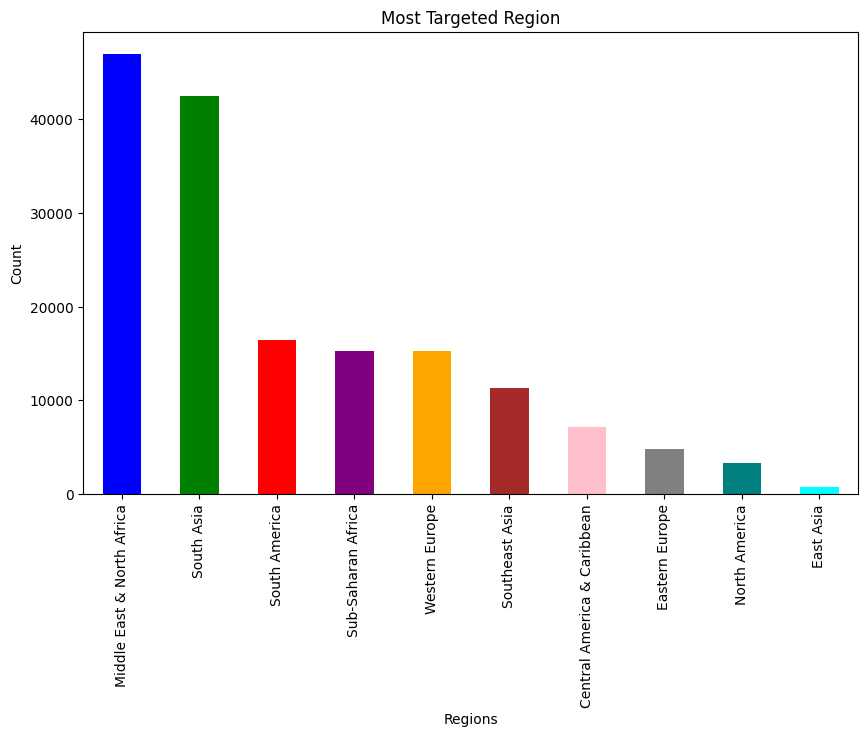

In [23]:
plt.figure(figsize=(10, 6))
set0 = ['blue', 'green', 'red', 'purple', 'orange', 'brown', 'pink', 'grey', 'teal', 'cyan']
ax = df['region_txt'].value_counts().head(10).plot(kind='bar', color=set0)

# Customize the plot
ax.set_xticklabels(ax.get_xticklabels(), rotation=90)
ax.set_title('Most Targeted Region')
ax.set_xlabel("Regions")
ax.set_ylabel("Count")


# Show the plot
plt.show()

## Most targeted cities

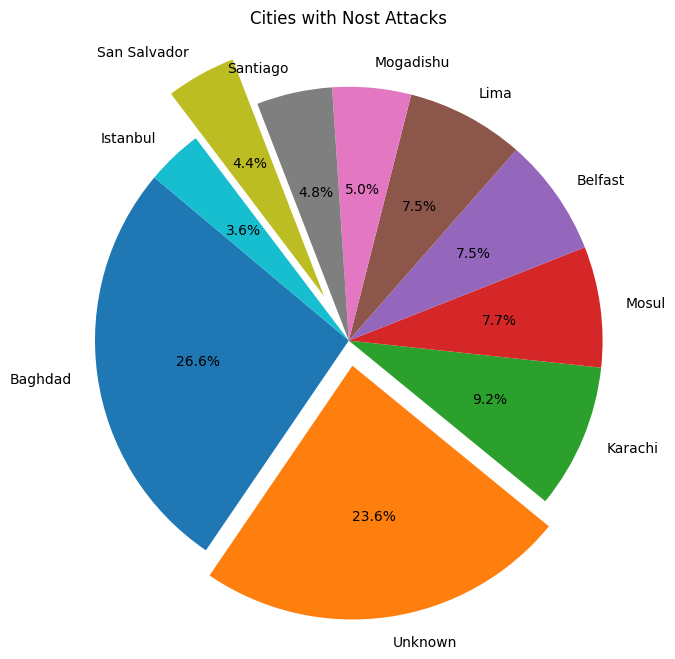

In [24]:
explode = (0, 0.1, 0, 0, 0, 0, 0, 0, 0.2, 0)
top_cities = df['city'].value_counts().head(10)
labels = top_cities.index
sizes = top_cities.values

# Create a pie chart
plt.figure(figsize=(8, 8))
plt.pie(sizes, labels=labels, explode=explode, autopct='%1.1f%%', startangle=140)

# Customize the plot
plt.title('Cities with Nost Attacks')

# Show the plot
plt.axis('equal')  # Equal aspect ratio ensures that the pie chart is circular
plt.show()

## Top 10 most used attack types


In [25]:
import plotly.express as px
counts = df['attacktype1_txt'].value_counts().head(8)

treemap_data = pd.DataFrame({'attack_types': counts.index, 'Count': counts.values})

fig = px.treemap(treemap_data, path=['attack_types'], values='Count',
                 title='Most used attack types',
                 color='Count', color_continuous_scale='reds')


fig.update_layout(width=1000, height=500)

fig.show()

## Target Types

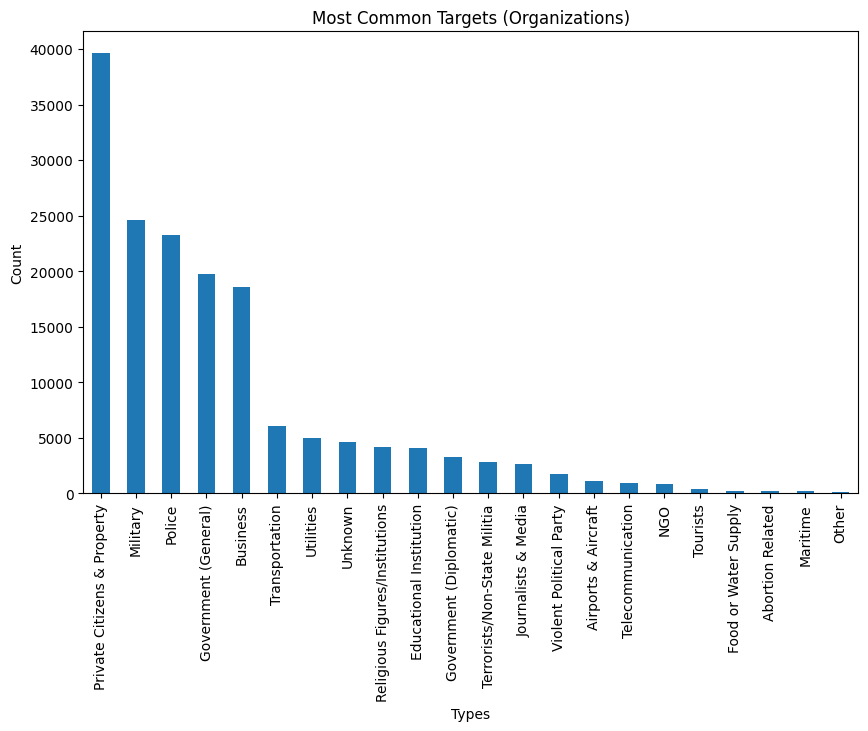

In [26]:
plt.figure(figsize=(10, 6))
ax = df['targtype1_txt'].value_counts().plot(kind='bar')

# Customize the plot
ax.set_xticklabels(ax.get_xticklabels(), rotation=90)
ax.set_title('Most Common Targets (Organizations)')
ax.set_ylabel("Count")
ax.set_xlabel("Types")

# Show the plot
plt.show()

## Target Nationality


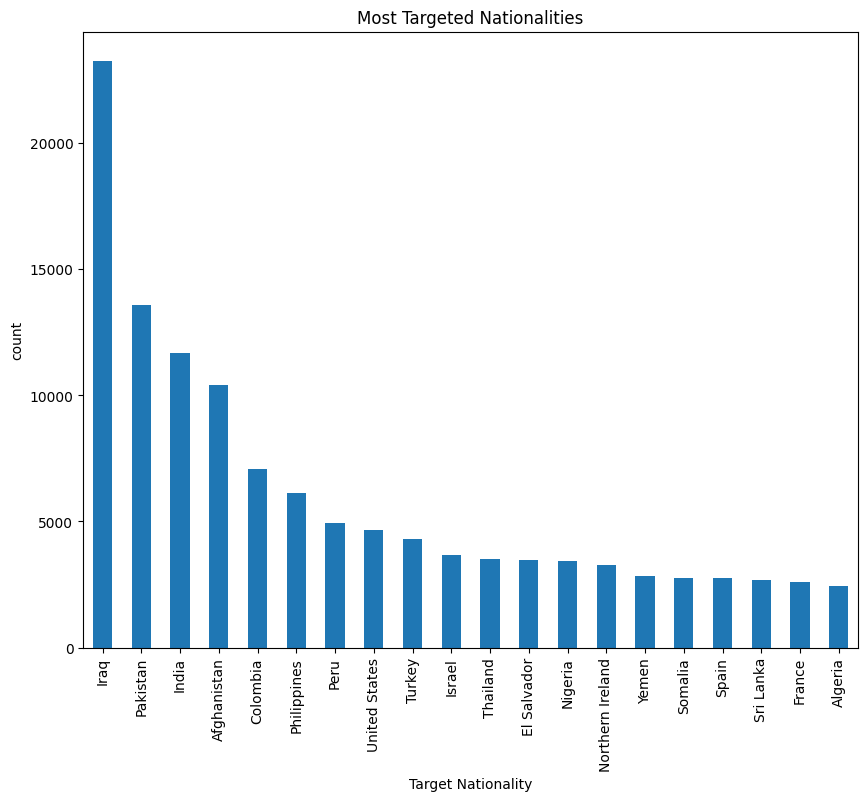

In [27]:
top_nationalities = df['natlty1_txt'].value_counts().head(20)

# Create a bar plot
plt.figure(figsize=(10, 8))
ax = top_nationalities.plot(kind='bar')

ax.set_title("Most Targeted Nationalities")
ax.set_ylabel("count")
ax.set_xlabel("Target Nationality")

plt.show()

## Weapon Type

In [28]:

weapons = df["weaptype1_txt"].value_counts().head(6)
x = weapons.index
y = weapons.values
print(x)

plt.figure(figsize=(8, 6))
ax = plt.gca()

plt.stem(x, y, linefmt='b-', markerfmt='bo', basefmt=' ')

# Customize the plot

plt.title('Types of Weapons Used')
plt.xlabel('Weapons')
plt.ylabel('Count')

# Show the plot
plt.grid(True)
plt.show()

Index(['Explosives', 'Firearms', 'Unknown', 'Incendiary', 'Melee', 'Chemical'], dtype='object')


## Group Responsible

In [29]:
sns.countplot(data=df,y='gname',order=df['gname'].value_counts()[1:15].index)
plt.title('Group With Highest Terror Attacks')
plt.xticks(rotation=90)
plt.show()

## Continuous data

Continuous Columns:

1. iyear (Continuous): Year of the incident.
2. imonth (Continuous): Month of the incident.
3. iday (Continuous): Day of the incident.
4. country (Continuous): Numeric code representing the country where the incident occurred.
5. region (Continuous): Numeric code representing the region where the incident occurred.
6. latitude (Continuous): Latitude coordinates of the incident location.
7. longitude (Continuous): Longitude coordinates of the incident location.
8. success (Continuous): Binary indicator of whether the attack was successful (1) or not (0).
9. suicide (Continuous): Binary indicator of whether the attack was a suicide attack (1) or not (0).
10. attacktype1 (Continuous): Numeric code representing the type of attack.
11. targtype1 (Continuous): Numeric code representing the target type.
12. targsubtype1 (Continuous): Numeric code representing the target subtype.
13. natlty1 (Continuous): Numeric code representing the nationality of the target.
14. property (Continuous): Binary indicator of property damage (1) or not (0).

## No of attacks by year


In [30]:
plt.figure(figsize=(10,6))

count = df['iyear'].value_counts()
ax = count.plot(kind='bar', color='brown')

ax.set_title("Attacks by Year")
ax.set_ylabel("Count")
ax.set_xlabel("Year")

plt.show()

## Months with most attacks

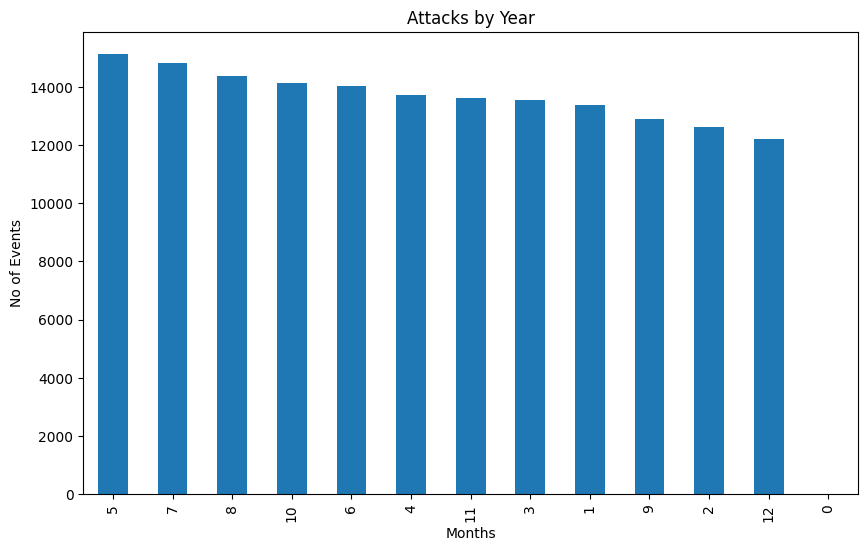

In [31]:
plt.figure(figsize=(10,6))

count = df['imonth'].value_counts()
ax = count.plot(kind='bar')

ax.set_title("Attacks by Year")
ax.set_ylabel("No of Events")
ax.set_xlabel("Months")

plt.show()

## Number of attacks by day

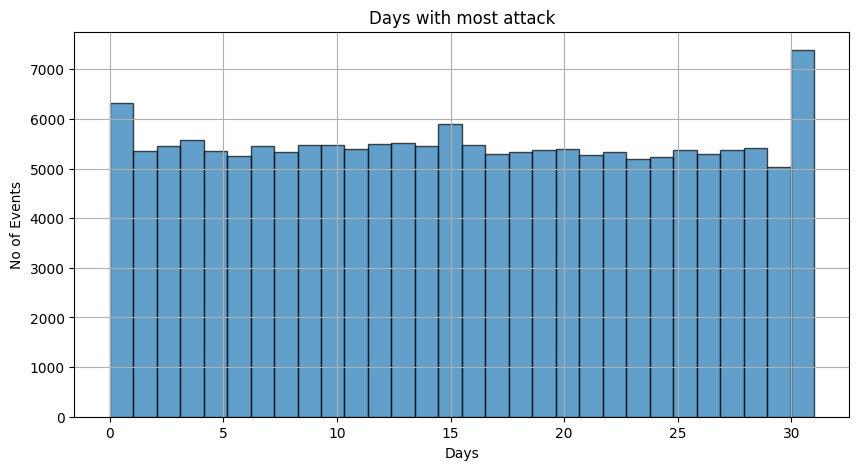

In [32]:
plt.figure(figsize=(10,5))
plt.hist(df['iday'], bins=30, edgecolor='k', alpha=0.7)

plt.xlabel('Days')
plt.ylabel('No of Events')
plt.title('Days with most attack')


plt.grid(True)
plt.show()

## Succcess Rate of ATTACK

1    145824
0     18748
Name: success, dtype: int64


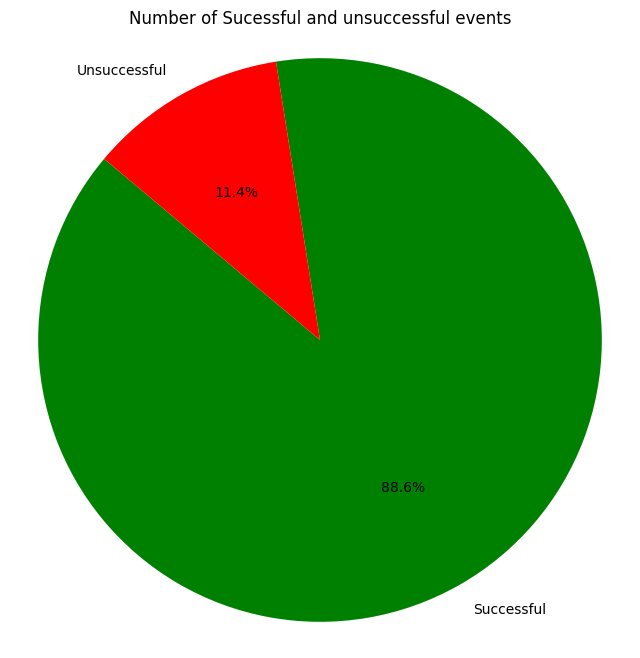

In [65]:
explode = (0, 0)
success = df['success'].value_counts()
print(success)
labels = "Successful", "Unsuccessful"
sizes = success.values


plt.figure(figsize=(8, 8))
plt.pie(sizes, labels=labels,explode=explode, colors = ("green", "red"), autopct='%1.1f%%', startangle=140)


plt.title('Number of Sucessful and unsuccessful events')


plt.axis('equal')
plt.show()

## Bivariate Analysis

In [34]:
df.head(10)

iyear  imonth  iday  country    country_txt  region      region_txt  \
1    1970       0     0      130         Mexico       1   North America   
2    1970       1     0      160    Philippines       5  Southeast Asia   
5    1970       1     1      217  United States       1   North America   
6    1970       1     2      218        Uruguay       3   South America   
7    1970       1     2      217  United States       1   North America   
8    1970       1     2      217  United States       1   North America   
9    1970       1     3      217  United States       1   North America   
10   1970       1     1      217  United States       1   North America   
11   1970       1     6      217  United States       1   North America   
12   1970       1     8       98          Italy       8  Western Europe   

     provstate         city   latitude   longitude  success  suicide  \
1      Federal  Mexico city  19.371887  -99.086624        1        0   
2       Tarlac      Unknown  15.478598  120.599741        1        0   
5     Illinois        Cairo  37.005105  -89.176269        1        0   
6   Montevideo   Montevideo -34.891151  -56.187214        0        0   
7   California      Oakland  37.791927 -122.225906        1        0   
8    Wisconsin      Madison  43.076592  -89.412488        1        0   
9    Wisconsin      Madison  43.072950  -89.386694        1        0   
10   Wisconsin      Baraboo  43.468500  -89.744299        0        0   
11    Colorado       Denver  39.758968 -104.876305        1        0   
12       Lazio         Rome  41.890961   12.490069        1        0   

    attacktype1                 attacktype1_txt  targtype1  nkill  \
1             6     Hostage Taking (Kidnapping)          7    0.0   
2             1                   Assassination         10    1.0   
5             2                   Armed Assault          3    0.0   
6             1                   Assassination          3    0.0   
7             3               Bombing/Explosion         21    0.0   
8             7  Facility/Infrastructure Attack          4    0.0   
9             7  Facility/Infrastructure Attack          2    0.0   
10            3               Bombing/Explosion          4    0.0   
11            7  Facility/Infrastructure Attack          4    0.0   
12            4                       Hijacking          6    0.0   

              targtype1_txt  \
1   Government (Diplomatic)   
2       Journalists & Media   
5                    Police   
6                    Police   
7                 Utilities   
8                  Military   
9      Government (General)   
10                 Military   
11                 Military   
12      Airports & Aircraft   

                                              target1  natlty1    natlty1_txt  \
1                             Nadine Chaval, daughter     21.0        Belgium   
2                                            Employee    217.0  United States   
5                           Cairo Police Headquarters    217.0  United States   
6   Juan Maria de Lucah/Chief of Directorate of in...    218.0        Uruguay   
7                                     Edes Substation    217.0  United States   
8   R.O.T.C. offices at University of Wisconsin, M...    217.0  United States   
9   Selective Service Headquarters in Madison Wisc...    217.0  United States   
10                            Badger Army ammo depot.    217.0  United States   
11           Army Recruiting Station, Denver Colorado    217.0  United States   
12                              Flight 802 Boeing 707    217.0  United States   

                                 gname weaptype1_txt  property        dbsource  
1   23rd of September Communist League       Unknown         0            PGIS  
2                              Unknown       Unknown         0            PGIS  
5                   Black Nationalists      Firearms         1  Hewitt Project  
6                  Tupamaros (Uruguay)      Firearms         0     

In [35]:
df['nkill'].min()

0.0

In [36]:
df["nkill"] = df["nkill"].astype(int)
df;

## Types of attack wrt. countries


In [37]:
plt.subplots(figsize=(15,6))
sns.countplot(data=df, x='country_txt',order=df['country_txt'].value_counts().head(10).index, hue='attacktype1_txt')
plt.xticks(rotation=90)
plt.xlabel('Countries')
plt.ylabel('No of Events')
plt.title('Attack Type W.R.T Countries')
plt.show()

In [38]:
plt.subplots(figsize=(15,6))
sns.countplot(data=df, x='city',order=df['city'].value_counts().head(10).index, hue='attacktype1_txt')
plt.xticks(rotation=90)
plt.xlabel('Cities')
plt.ylabel('No of Events')
plt.title('Attack Type W.R.T Cities')
plt.show()

In [39]:
plt.subplots(figsize=(15,6))
sns.countplot(data=df, x='country_txt',order=df['country_txt'].value_counts().head(20).index, hue='success')
plt.xticks(rotation=90)
plt.xlabel('Countries')
plt.ylabel('No of Events')
plt.title('Countries vs Success Rate')
plt.show()

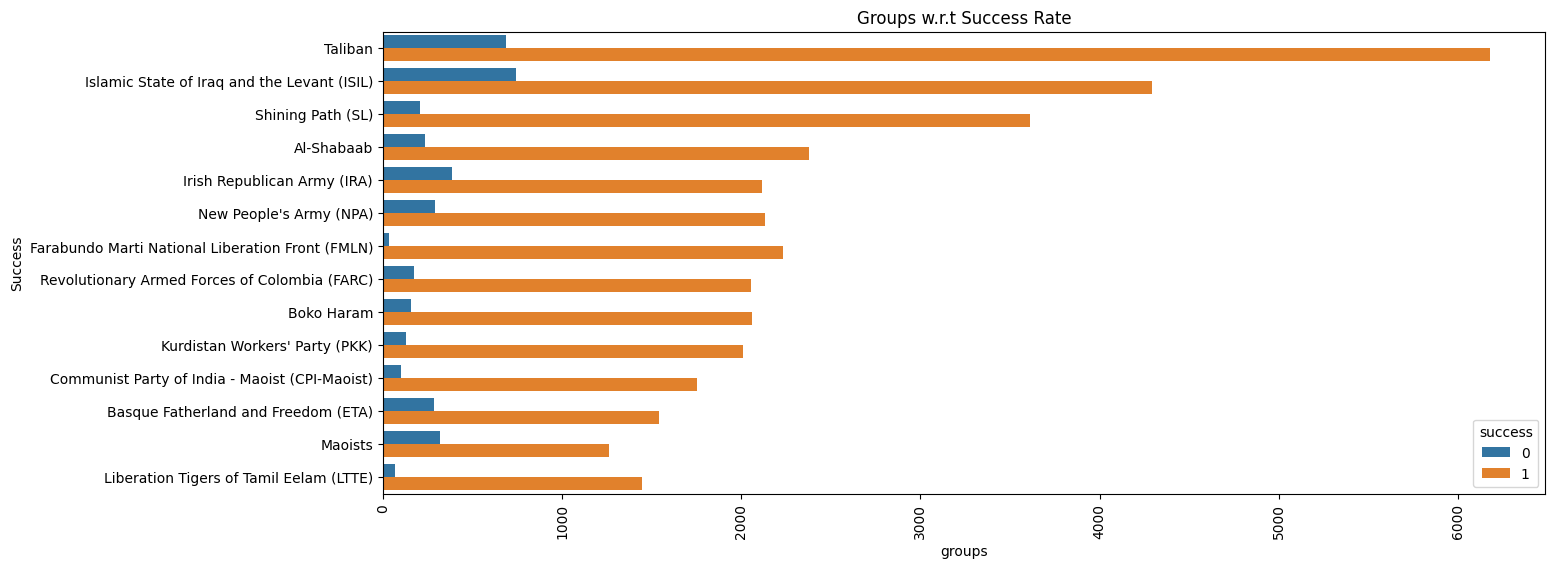

In [40]:
plt.subplots(figsize=(15,6))
sns.countplot(data=df,y='gname',order=df['gname'].value_counts()[1:15].index, hue = "success")
plt.title('Groups w.r.t Success Rate')
plt.xlabel('groups')
plt.ylabel('Success')
plt.xticks(rotation=90)
plt.show()

In [41]:
# df.groupby('Region')[['Killed','Wounded']].count().sort_values(by=['Killed','Wounded'],ascending=False).head(10)
plt.subplots(figsize=(15,6))
sns.countplot(data=df, x='suicide',order=df['suicide'].value_counts().head(20).index, hue='success')
plt.xticks(rotation=90)
plt.xlabel('suicide')
plt.ylabel('success')
plt.title('Suicide attacks vs Success Rate')
plt.show()

## Multivariate Analysis


In [42]:
plt.figure(figsize=(15,5))
sns.heatmap(df.corr(),annot=True ,cmap="YlGn" )
plt.show()


<ipython-input-42-777aa1cd828a>:2: FutureWarning:

The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.



In [46]:
groups = df['gname'].value_counts()[1:14].index
filtered_data = df[df['gname'].isin(groups)]

# Create an interactive map using px.scatter_mapbox
fig = px.scatter_mapbox(filtered_data, lat='latitude', lon='longitude',
                        hover_name='gname', color='gname',
                        title='Regional Activities of Terrorist Groups',
                        zoom=1, height=800)

# Customize the map layout
fig.update_layout(mapbox_style="carto-positron")
fig.update_geos(projection_type="orthographic")
fig.update_traces(marker=dict(size=10, opacity=0.5))

# Show the interactive map
fig.show()

In [49]:
kills = df['nkill'].value_counts()
filtered_data = df[df['nkill'].isin(kills)]

# Create an interactive map using px.scatter_mapbox
fig = px.scatter_mapbox(filtered_data, lat='latitude', lon='longitude',
                        hover_name='nkill', color='nkill',
                        title='Number of kills by Cities',
                        zoom=1, height=800)

# Customize the map layout
fig.update_layout(mapbox_style="carto-positron")
fig.update_geos(projection_type="orthographic")
fig.update_traces(marker=dict(size=10, opacity=0.5))

# Show the interactive map
fig.show()

In [59]:
success_rate = df['success']
filtered_data = df[df['success'].isin(success_rate)]

# Create an interactive map using px.scatter_mapbox
fig = px.scatter_mapbox(filtered_data, lat='latitude', lon='longitude',
                        hover_name='success', color='success',
                        title='Successful Attacks by Region',
                        zoom=1, height=800)

# Customize the map layout
fig.update_layout(mapbox_style="carto-positron")
fig.update_geos(projection_type="orthographic")
fig.update_traces(marker=dict(size=10, opacity=0.5))

# Show the interactive map
fig.show()

## Conclusion
1. Iraq is the most attaked country by the terrorists.
2. The Year 2014 had the highest number of attacks
3. Baghdadh is the most attacked city followed by Karachi and Mosul
4. The most active groups with maximum number of killings are Taliban and ISIL
5. Explosives like bombs are the most used weapon type and these type of weapons also have resulted in the highest number of killings.
6. Out of all the attacks, 88.6% of attacks were successful.
7. The month of May had the most number of attacks.
8. Middle East and North Africa are the most targeted areas or regions.
9. Suicide attacks have lower success rate
10. The success rate of these attacks is higher than the failure rate. i.e most of the attacks were not prevented.